In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
true_min = [3,5]

In [10]:
#Define the dataset
true_func = lambda x: true_min[0]*x+true_min[1]
len_data = 1000
x_data = np.linspace(-10,10,len_data)
epsilon_noise = np.zeros(len_data) #np.random.normal(loc=0,scale=0.5,size=len_data)
y_data = true_func(x_data)+epsilon_noise

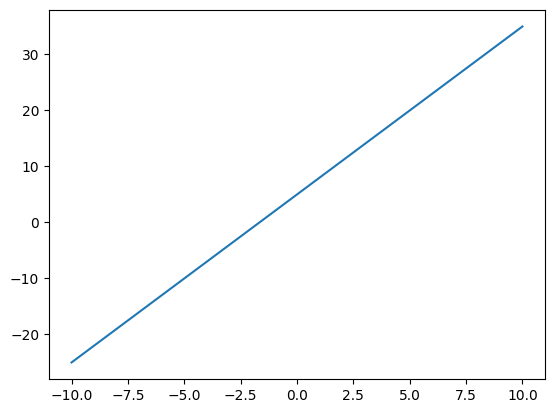

In [28]:
plt.plot(x_data,y_data)

In [29]:
def get_data(num_choices):
    inds = np.random.choice(len_data,num_choices) #Picks 10 numbers by random 
    return x_data[inds],y_data[inds]

In [30]:
#Define the neural network
class r_model():
    def __init__(self,init_w,init_b):
        self.num_layers = 1
        self.w = init_w
        self.b = init_b
    def forward(self,x,w,b):
        return w*x + b
    def update(self,w,b):
        self.w = w
        self.b = b

#Define loss function
def loss(nn,w,b,xs,ys):
    losses = []
    N = len(ys)
    for i,x in enumerate(xs):
        losses.append((nn.forward(x,w,b)-ys[i])**2)
    return (1/(2*N))*np.sum(losses)



In the example below we restrict w to be in -10 to 10, and b to be between -5 and 5

In [31]:
model = r_model(0.2,6)
beta = 0.5
#Epochs
steps = [(model.w,model.b)]
losses = []
acpt_losses = []
former_loss = 0
eps = 0.00001
batch_size = 64

best_loss = np.inf
bestw = 0
bestb = 0
for i in range(100000):
    #Propose wp
    wp = np.random.uniform(-10,10)
    bp = np.random.uniform(-10,10)
    #Get random set of data
    xs,ys = get_data(batch_size) 
    proposal_loss = loss(model,wp,bp,xs,ys)
    current_loss = loss(model,model.w,model.b,xs,ys)
    p_loss = np.exp(-beta*(proposal_loss-current_loss))
    accept_prob = np.min((p_loss,1))
    accept = bool(np.random.binomial(1,accept_prob,size=1))
    losses.append(proposal_loss)
    if accept:
        acpt_losses.append(proposal_loss)
        model.w = wp
        model.b = bp
        steps.append((model.w,model.b))
        former_loss = p_loss

        if proposal_loss < best_loss:
            best_loss = proposal_loss
            bestw = wp
            bestb = bp

print("Iters run:",i)


Iters run: 99999


In [32]:
matrix_steps = np.vstack(steps)

Text(0.5, 1.0, 'MCMC Weight Selection')

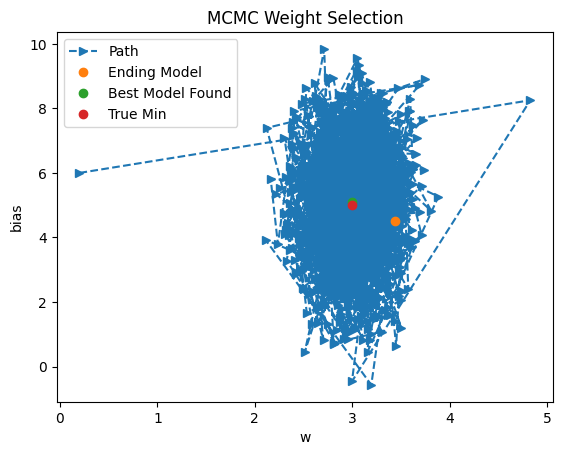

In [40]:
plt.plot(matrix_steps[:,0],matrix_steps[:,1],'-->',label="Path")
plt.plot(matrix_steps[-1,0],matrix_steps[-1,1],'o',label="Terminating Model")
plt.plot(bestw,bestb,'o',label="Best Found Model")
plt.plot(true_min[0],true_min[1],'o',label="True Min")
plt.xlabel("w")
plt.ylabel("bias")
plt.legend()
plt.title("MCMC Weight Selection")

In [34]:
print("Model Weights found:",model.w,model.b)
print("Best Min Found:",bestw,bestb)
print("True min",true_min[0],true_min[1])

Model Weights found: 3.438674604082488 4.512690716406794
Best Min Found: 2.9977030990777216 5.104646354125668
True min 3 5


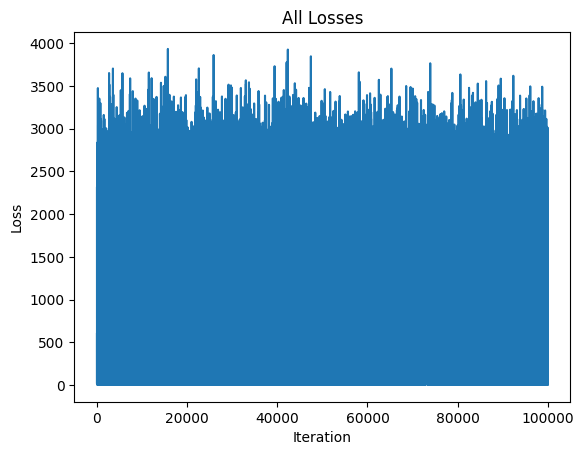

In [39]:
plt.plot(losses)
plt.title("All Losses")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

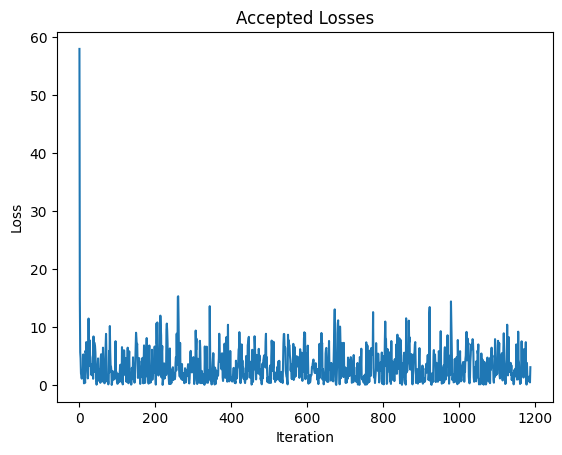

In [38]:
plt.plot(acpt_losses)
plt.title("Accepted Losses")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()